In [2]:
#Import statements
import matplotlib.pyplot as plt
from utils import frogdata
from pathlib import Path
import re

## Pulse Overlay + Measured FROG Traces

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


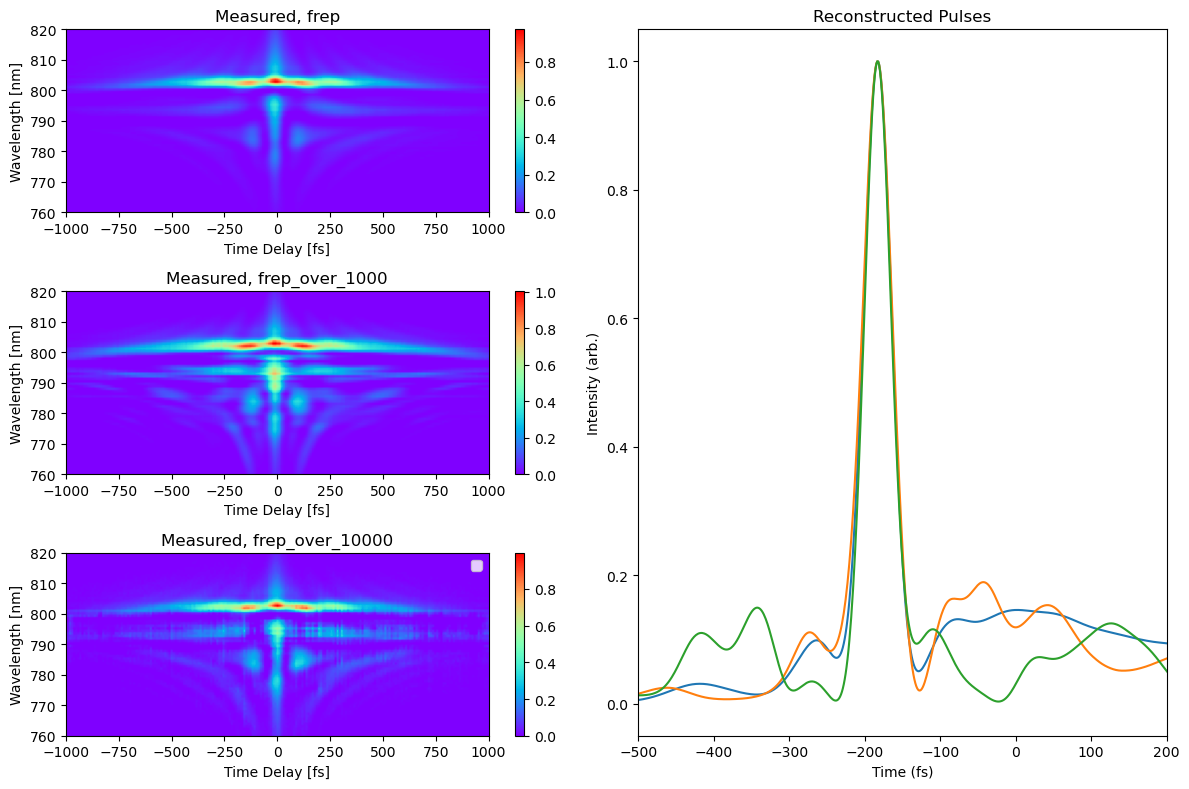

In [15]:
# File management
frog_path = Path(
    r'C:\Users\wahlm\Documents\School\Research\Allison\Tunable Pump\Data for Papers\Tunable seed\FROGs vs. pulse pattern\Low rep rate')
savepath = frog_path.parent / 'rep_rate_vs_pulse_norm_axis.eps'
pattern = r'.*'
sort = lambda frog: 0 if re.search(r'\d+', frog.label) is None else int(re.search(r'\d+', frog.label)[0])
label = lambda name: r'$f_{rep}$' if re.search(r'\d+', frog.label) is None else r'$f_{rep}/$' + (re.search(r'\d+', name)[0])
save_files = False

# Plotting options
panels = [['Trace 0', 'Pulses'],
          ['Trace 1', 'Pulses'],
          ['Trace 2', 'Pulses']]
cmap = 'rainbow'
f, ax = plt.subplot_mosaic(mosaic=panels, figsize=(12,8))

ax['Pulses'].set_xlabel('Time (fs)')
ax['Pulses'].set_ylabel('Intensity (arb.)')
ax['Pulses'].set_title('Reconstructed Pulses')
ax['Pulses'].set_xlim([-500, 200])

for i in range(3):
    ax[f'Trace {i}'].set_ylim([760, 820])
    ax[f'Trace {i}'].set_xlim([-1000, 1000])
    ax[f'Trace {i}'].set_xlabel('Time Delay [fs]')
    ax[f'Trace {i}'].set_ylabel('Wavelength [nm]')

    
fullscreen = False

# Do the thing
frogs = frogdata.read_frog_directory(frog_path, pattern=pattern)
frogs = sorted(frogs, key=sort)
frogs = [frogs[0], frogs[4], frogs[5]]
for i, frog in enumerate(frogs):
    # Fix the phase signs to all be the same (pulse maximum on the left of the plot)
    if frog.pulse_time[frog.pulse_intensity == max(frog.pulse_intensity)] > frog.pulse_time[
                                                                int(len(frog.pulse_time) / 2)]:
        frog.pulse_intensity = frog.pulse_intensity[::-1]

    # Have all the maxima overlap one another in time
    frog.pulse_time = frog.pulse_time - (frog.pulse_time[frog.pulse_intensity == max(frog.pulse_intensity)] -
                                            frogs[0].pulse_time[frogs[0].pulse_intensity == max(frogs[0].pulse_intensity)])

    # Plot the pulse
    
    # Plot the trace
    map = ax[f'Trace {i}'].imshow(frog.trace, aspect='auto', extent=[min(frog.delays), max(frog.delays), min(frog.wavelengths),
                                                      max(frog.wavelengths)], cmap=cmap)
    plt.colorbar(map)
    ax['Pulses'].plot(frog.pulse_time, frog.pulse_intensity, label=f'{label(frog.label)}: FWHM={frog.t_FWHM: .1f} fs')
    ax[f'Trace {i}'].set_title(f'Measured, {frog.label}')
    plt.legend()

    
if fullscreen:
    f.canvas.manager.window.showMaximized()  # toggle fullscreen mode
plt.tight_layout()
if save_files:
    plt.savefig(savepath, dpi=500)
plt.show()
